In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import librosa
import fnmatch 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, ConfusionMatrixDisplay
from scipy.signal import butter, lfilter

from IPython.display import Audio  # Для прослушивания в Jupyter
import IPython.display as ipd

In [71]:
# Функция для применения БИХ фильтра Баттерворта
def butter_lowpass(cutoff, fs, order):
    #nyquist = 0.5 * fs  # Частота Найквиста
    #normal_cutoff = cutoff / nyquist  # Нормализованная частота среза
    #b, a = butter(order, normal_cutoff, btype='low', analog=False)
    b, a = butter(3, 0.2)
    return b, a

# Применение фильтрации
def butter_filter_signal(signal, cutoff, fs, order=3):
    b, a = butter_lowpass(cutoff, fs, order)
    return lfilter(b, a, signal)

# Загрузка аудио файла (возьмем один пример)
folder_path = 'C:/Users/Mary/Desktop/Диплом/all_music/'
file = 'MT0040033011.mp3'  # Укажите путь к вашему файлу
audio_path = os.path.join(folder_path, file)

# Загружаем аудио файл
y, sr = librosa.load(audio_path, sr=None, res_type='kaiser_fast')

# Частота среза для фильтрации (например, 0.2)
cutoff_frequency = 0.2

# Применяем фильтрацию
y_filtered = butter_filter_signal(y, cutoff_frequency, sr)


In [11]:
b, a = butter(3, 0.01)
yf_01 = lfilter(b, a, y)

In [5]:
# Прослушивание оригинального сигнала
print("Оригинальное аудио:")
ipd.Audio(y, rate=sr)  # Проигрываем оригинал
#ipd.Audio(Music_dir + '/Track12.wav')    


Оригинальное аудио:


In [73]:
# Прослушивание отфильтрованного сигнала
print("Отфильтрованное аудио:")
ipd.Audio(y_filtered, rate=sr)  # Проигрываем фильтрованный сигнал

Отфильтрованное аудио:


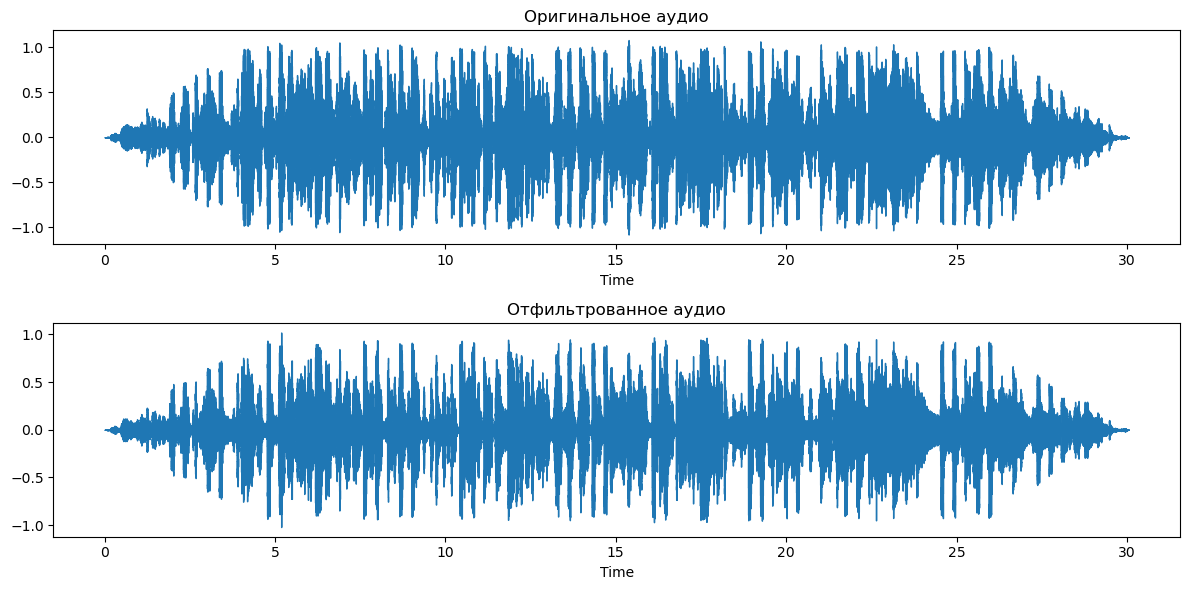

In [45]:
# Для визуализации (если нужно) можно сравнить спектры:
plt.figure(figsize=(12, 6))

# Спектр оригинала
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title("Оригинальное аудио")

# Спектр отфильтрованного сигнала
plt.subplot(2, 1, 2)
librosa.display.waveshow(y_filtered, sr=sr)
plt.title("Отфильтрованное аудио")

plt.tight_layout()
plt.show()

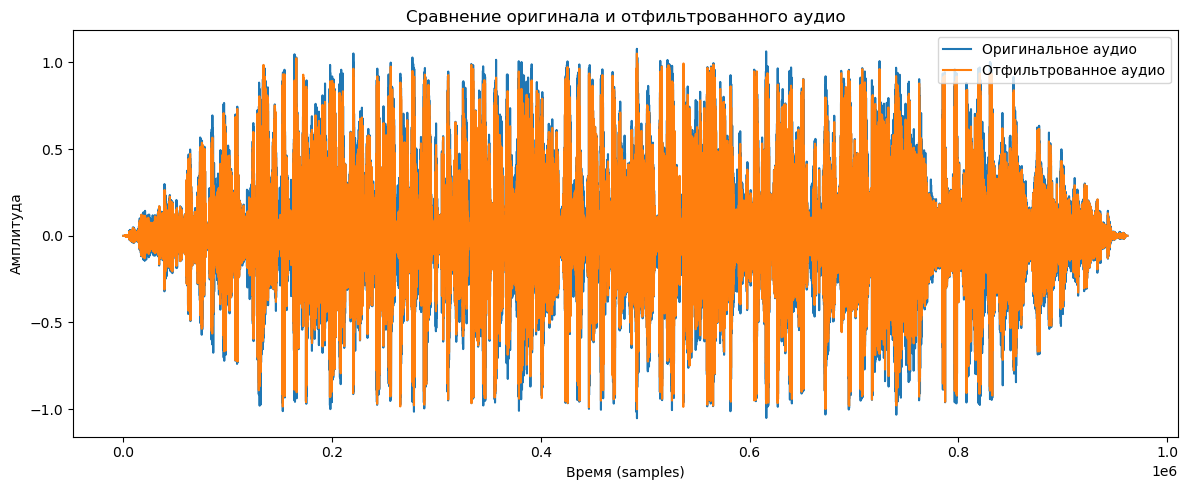

In [75]:
import matplotlib.pyplot as plt
import librosa.display

# Для визуализации на одном графике
plt.figure(figsize=(12, 5))

# Визуализируем оригинальное аудио в одном цвете
plt.plot(y, label='Оригинальное аудио')

# Визуализируем отфильтрованное аудио в другом цвете
plt.plot(y_filtered, label='Отфильтрованное аудио')

# Добавляем легенду
plt.legend(loc='upper right')

# Подписываем оси и добавляем заголовок
plt.title("Сравнение оригинала и отфильтрованного аудио")
plt.xlabel("Время (samples)")
plt.ylabel("Амплитуда")

# Показываем график
plt.tight_layout()
plt.show()


In [9]:
pip install soundfile pydub

Note: you may need to restart the kernel to use updated packages.


# Фильтрация с помощью БИХ-фильтра Баттерворта и сохранение аудиофайлов

In [85]:
import soundfile as sf
# Функция для применения БИХ фильтра Баттерворта
def butter_lowpass(cutoff, fs, order=3):
    nyquist = 0.5 * fs  # Частота Найквиста
    normal_cutoff = cutoff / nyquist  # Нормализованная частота среза
    #b, a = butter(order, normal_cutoff, btype='low', analog=False)
    b, a = butter(3, 0.2)
    return b, a

# Применение фильтрации
def butter_filter_signal(signal, cutoff, fs, order=1):
    b, a = butter_lowpass(cutoff, fs, order)
    return lfilter(b, a, signal)

# Папка с аудиофайлами
folder_path = 'C:/Users/Mary/Desktop/Диплом/all_music/'
files = fnmatch.filter(os.listdir(folder_path), '*.mp3')

# Папка для сохранения отфильтрованных файлов
output_folder = 'C:/Users/Mary/Desktop/Диплом/2_all_music_filtered/'

# Если папка не существует, создаем её
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Частота среза для фильтрации
cutoff_frequency = 0.2

# Обрабатываем каждый файл
for file in files:
    # Загружаем аудиофайл
    audio_path = os.path.join(folder_path, file)
    y, sr = librosa.load(audio_path, sr=None, res_type='kaiser_fast')
    
    # Применяем фильтрацию
    y_filtered = butter_filter_signal(y, cutoff_frequency, sr)

    # Путь для сохранения отфильтрованного файла
    output_file_path = os.path.join(output_folder, file)
    
    # Сохраняем отфильтрованный аудиофайл
    sf.write(output_file_path, y_filtered, sr)

print("Обработка завершена.")


Обработка завершена.


In [87]:
import os
import fnmatch
import numpy as np
import librosa
import librosa.display
from sklearn.preprocessing import StandardScaler

# Папка с аудиофайлами
folder_path = 'C:/Users/Mary/Desktop/Диплом/2_all_music_filtered/'
files = fnmatch.filter(os.listdir(folder_path), '*.mp3')

# Списки для хранения признаков и имен файлов
chroma_features_list = []
file_names = []

for file in files:
    # Загружаем аудиофайл
    audio_path = os.path.join(folder_path, file)
    y, sr = librosa.load(audio_path, sr=None, res_type='kaiser_fast')

    # 🔹 1. Хромаграмма CQT (широкий частотный диапазон)
    chroma_cqt = librosa.feature.chroma_cqt(y=y, sr=sr, bins_per_octave=60, n_chroma=60)
    
    # 🔹 2. Хромаграмма STFT (учитывает динамику атаки)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)

    # 🔹 3. Хромаграмма CENS (устойчива к шуму)
    chroma_cens = librosa.feature.chroma_cens(y=y, sr=sr)

    # 🔹 4. Логарифмирование хромаграмм (чтобы выделить слабые ноты)
    chroma_cqt = np.log1p(chroma_cqt)
    chroma_stft = np.log1p(chroma_stft)
    chroma_cens = np.log1p(chroma_cens)

    # 🔹 5. Вычисляем статистики по каждой хромаграмме
    def extract_statistics(feature):
        return np.hstack([
            np.mean(feature, axis=1),    # Среднее
            np.std(feature, axis=1),     # Стандартное отклонение
            np.median(feature, axis=1),  # Медиана
            np.max(feature, axis=1) - np.min(feature, axis=1)  # Размах
        ])

    chroma_cqt_stats = extract_statistics(chroma_cqt)
    chroma_stft_stats = extract_statistics(chroma_stft)
    chroma_cens_stats = extract_statistics(chroma_cens)

    # 🔹 6. Объединяем все статистики в единый вектор
    chroma_features = np.hstack([chroma_cqt_stats, chroma_stft_stats, chroma_cens_stats])

    # Добавляем в список
    chroma_features_list.append(chroma_features)
    file_names.append(file)

# Преобразуем в numpy массив
chroma_array = np.array(chroma_features_list)

# 🔹 7. Нормализация признаков (ускоряет обучение моделей)
scaler = StandardScaler()
chroma_array_scaled = scaler.fit_transform(chroma_array)

# Вывод информации о данных
print(f'Обработано {len(chroma_features_list)} файлов.')
print(f'Форма массива хромаграмм: {chroma_array_scaled.shape}')


Обработано 900 файлов.
Форма массива хромаграмм: (900, 336)


In [89]:
mel_list = []
mfcc_list = []
file_names = []

folder_path = 'C:/Users/Mary/Desktop/Диплом/2_all_music_filtered/'
files = fnmatch.filter(os.listdir(folder_path), '*.mp3')   

for file in files:
    audio_path = os.path.join(folder_path, file)
    y, sr = librosa.load(audio_path, sr=None, res_type='kaiser_fast')

    # Вычисляем Mel-спектрограмму
    mel = librosa.feature.melspectrogram(y=y, sr=sr)
    mel_list.append(mel.mean(axis=1))

    # Вычисляем MFCC
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    mfcc_list.append(mfcc.mean(axis=1))

    file_names.append(file)

In [91]:
# Списки для хранения темпов и имен файлов
tempo_list = []
file_names = []

folder_path = 'C:/Users/Mary/Desktop/Диплом/2_all_music_filtered/'
files = fnmatch.filter(os.listdir(folder_path), '*.mp3')

for file in files:
    audio_path = os.path.join(folder_path, file)
    y, sr = librosa.load(audio_path, sr=None, res_type='kaiser_fast')

    # Вычисляем темп (BPM)
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    tempo_list.append(tempo)  # Добавляем темп в список

    file_names.append(file)

# Создание DataFrame с двумя столбцами: имена файлов и темпы
tempo_df = pd.DataFrame({
    'file_name': file_names,  # Добавляем имена файлов
    'tempo': tempo_list  # Добавляем темпы
})

# Выводим информацию
print(f'Обработано {len(file_names)} файлов.')
print(f'Форма Tempo: {tempo_df.shape}')


Обработано 900 файлов.
Форма Tempo: (900, 2)


In [146]:
tempo_df['tempo'][897]

array([73.52941176])

In [93]:
chroma_df = pd.DataFrame(chroma_features_list)
mfcc_df = pd.DataFrame(mfcc_list)
mel_df = pd.DataFrame(mel_list)

In [95]:
df_combined = pd.concat([chroma_df, mel_df, mfcc_df], axis=1)

In [97]:
df_combined.columns = range(df_combined.shape[1])

In [99]:
df_combined[0]

0      0.310712
1      0.414274
2      0.305788
3      0.159349
4      0.319765
         ...   
895    0.435563
896    0.401709
897    0.361773
898    0.225382
899    0.499589
Name: 0, Length: 900, dtype: float32

In [101]:
df_combined.head()

0         1         2         3         4         5         6    \
0  0.310712  0.244344  0.228165  0.232664  0.246327  0.269667  0.297929   
1  0.414274  0.421296  0.378353  0.335870  0.338816  0.329460  0.319723   
2  0.305788  0.318214  0.379111  0.530315  0.547093  0.455467  0.367740   
3  0.159349  0.162525  0.180489  0.226187  0.351252  0.407939  0.308748   
4  0.319765  0.310496  0.313133  0.318285  0.292288  0.258755  0.221410   

        7         8         9    ...       494       495       496       497  \
0  0.315571  0.366367  0.439960  ...  0.580173  0.385064  1.805988  4.126403   
1  0.321052  0.311604  0.305557  ... -7.457793 -4.263021 -1.978051 -1.576423   
2  0.302482  0.331850  0.361201  ... -1.820467 -3.210386 -1.968863 -4.131936   
3  0.187115  0.155417  0.148167  ... -1.749319 -0.189946 -2.230588 -3.247765   
4  0.230647  0.338095  0.364774  ...  0.767632 -4.303183 -3.462408  0.062312   

        498       499       500       501       502       503  
0  3.106738 -0.729550 -3.423570 -4.113529 -3.051134 -1.666236  
1 -3.635783 -3.793069 -3.351583 -5.604929 -2.736143 -1.866219  
2 -3.592173 -2.133344 -3.351498 -2.103030 -2.296009 -1.891365  
3 -0.614801 -0.178140 -0.622828  1.569462  1.582979  0.080865  
4  0.154971  1.295792  0.668265 -1.683523 -1.360671 -2.200322  

[5 rows x 504 columns]

In [103]:
chroma_df = df_combined

In [105]:
music_df = pd.read_csv('C:/Users/Mary/Desktop/Диплом/MER_audio_taffc_dataset/panda_dataset_taffc_metadata.csv')

In [107]:
music_df['Artist'] = music_df['Artist'].isna().fillna('no_name')

In [109]:
chroma_df.head()

0         1         2         3         4         5         6    \
0  0.310712  0.244344  0.228165  0.232664  0.246327  0.269667  0.297929   
1  0.414274  0.421296  0.378353  0.335870  0.338816  0.329460  0.319723   
2  0.305788  0.318214  0.379111  0.530315  0.547093  0.455467  0.367740   
3  0.159349  0.162525  0.180489  0.226187  0.351252  0.407939  0.308748   
4  0.319765  0.310496  0.313133  0.318285  0.292288  0.258755  0.221410   

        7         8         9    ...       494       495       496       497  \
0  0.315571  0.366367  0.439960  ...  0.580173  0.385064  1.805988  4.126403   
1  0.321052  0.311604  0.305557  ... -7.457793 -4.263021 -1.978051 -1.576423   
2  0.302482  0.331850  0.361201  ... -1.820467 -3.210386 -1.968863 -4.131936   
3  0.187115  0.155417  0.148167  ... -1.749319 -0.189946 -2.230588 -3.247765   
4  0.230647  0.338095  0.364774  ...  0.767632 -4.303183 -3.462408  0.062312   

        498       499       500       501       502       503  
0  3.106738 -0.729550 -3.423570 -4.113529 -3.051134 -1.666236  
1 -3.635783 -3.793069 -3.351583 -5.604929 -2.736143 -1.866219  
2 -3.592173 -2.133344 -3.351498 -2.103030 -2.296009 -1.891365  
3 -0.614801 -0.178140 -0.622828  1.569462  1.582979  0.080865  
4  0.154971  1.295792  0.668265 -1.683523 -1.360671 -2.200322  

[5 rows x 504 columns]

In [111]:
combined_df = pd.concat([chroma_df, pd.Series(file_names, name='Song')], axis=1)

In [113]:
combined_df['Song'] = combined_df['Song'].str[:12]

In [115]:
combined_df.head()

0         1         2         3         4         5         6  \
0  0.310712  0.244344  0.228165  0.232664  0.246327  0.269667  0.297929   
1  0.414274  0.421296  0.378353  0.335870  0.338816  0.329460  0.319723   
2  0.305788  0.318214  0.379111  0.530315  0.547093  0.455467  0.367740   
3  0.159349  0.162525  0.180489  0.226187  0.351252  0.407939  0.308748   
4  0.319765  0.310496  0.313133  0.318285  0.292288  0.258755  0.221410   

          7         8         9  ...       495       496       497       498  \
0  0.315571  0.366367  0.439960  ...  0.385064  1.805988  4.126403  3.106738   
1  0.321052  0.311604  0.305557  ... -4.263021 -1.978051 -1.576423 -3.635783   
2  0.302482  0.331850  0.361201  ... -3.210386 -1.968863 -4.131936 -3.592173   
3  0.187115  0.155417  0.148167  ... -0.189946 -2.230588 -3.247765 -0.614801   
4  0.230647  0.338095  0.364774  ... -4.303183 -3.462408  0.062312  0.154971   

        499       500       501       502       503          Song  
0 -0.729550 -3.423570 -4.113529 -3.051134 -1.666236  MT0000004637  
1 -3.793069 -3.351583 -5.604929 -2.736143 -1.866219  MT0000011357  
2 -2.133344 -3.351498 -2.103030 -2.296009 -1.891365  MT0000011975  
3 -0.178140 -0.622828  1.569462  1.582979  0.080865  MT0000040632  
4  1.295792  0.668265 -1.683523 -1.360671 -2.200322  MT0000044741  

[5 rows x 505 columns]

In [117]:
merged_df = pd.merge(music_df, combined_df, on='Song', how='left')

In [119]:
merged_df.head(5)

Song  Artist                            Title Quadrant     PQuad  \
0  MT0000004637   False  Bulldog Down in Sunny Tennessee       Q3  0.666667   
1  MT0000011357   False              Reborn in Blasphemy       Q2  0.666667   
2  MT0000011975   False              Ultrasonic Meltdown       Q2  0.666667   
3  MT0000040632   False             Flamencos en el Aire       Q1  0.750000   
4  MT0000044741   False                       Last Night       Q3  0.750000   

   MoodsTotal  Moods                                 MoodsFoundStr  \
0           3      3                       circular; greasy; messy   
1           3      3                    jittery; negative; nervous   
2           6      5  fierce; harsh; hostile; menacing; outrageous   
3           4      3                            fiery; sexy; spicy   
4           4      4                   greasy; gritty; gutsy; lazy   

                                            MoodsStr  \
0                            Circular; Greasy; Messy   
1                          Negative; Nervous/Jittery   
2  Fierce; Harsh; Hostile; Menacing; Outrageous; ...   
3                      Cathartic; Fiery; Sexy; Spicy   
4                        Greasy; Gritty; Gutsy; Lazy   

                                       MoodsStrSplit  ...       494       495  \
0                            Circular; Greasy; Messy  ...  0.580173  0.385064   
1                         Negative; Nervous; Jittery  ... -7.457793 -4.263021   
2  Fierce; Harsh; Hostile; Menacing; Outrageous; ...  ... -1.820467 -3.210386   
3                      Cathartic; Fiery; Sexy; Spicy  ... -1.749319 -0.189946   
4                        Greasy; Gritty; Gutsy; Lazy  ...  0.767632 -4.303183   

        496       497       498       499       500       501       502  \
0  1.805988  4.126403  3.106738 -0.729550 -3.423570 -4.113529 -3.051134   
1 -1.978051 -1.576423 -3.635783 -3.793069 -3.351583 -5.604929 -2.736143   
2 -1.968863 -4.131936 -3.592173 -2.133344 -3.351498 -2.103030 -2.296009   
3 -2.230588 -3.247765 -0.614801 -0.178140 -0.622828  1.569462  1.582979   
4 -3.462408  0.062312  0.154971  1.295792  0.668265 -1.683523 -1.360671   

        503  
0 -1.666236  
1 -1.866219  
2 -1.891365  
3  0.080865  
4 -2.200322  

[5 rows x 518 columns]

In [121]:
final_df = merged_df[['Quadrant'] + list(merged_df.columns[-504:])]
#merged_df = pd.concat(merged_df['Quadrant'], combined_df)
final_df.head()

Quadrant         0         1         2         3         4         5  \
0       Q3  0.310712  0.244344  0.228165  0.232664  0.246327  0.269667   
1       Q2  0.414274  0.421296  0.378353  0.335870  0.338816  0.329460   
2       Q2  0.305788  0.318214  0.379111  0.530315  0.547093  0.455467   
3       Q1  0.159349  0.162525  0.180489  0.226187  0.351252  0.407939   
4       Q3  0.319765  0.310496  0.313133  0.318285  0.292288  0.258755   

          6         7         8  ...       494       495       496       497  \
0  0.297929  0.315571  0.366367  ...  0.580173  0.385064  1.805988  4.126403   
1  0.319723  0.321052  0.311604  ... -7.457793 -4.263021 -1.978051 -1.576423   
2  0.367740  0.302482  0.331850  ... -1.820467 -3.210386 -1.968863 -4.131936   
3  0.308748  0.187115  0.155417  ... -1.749319 -0.189946 -2.230588 -3.247765   
4  0.221410  0.230647  0.338095  ...  0.767632 -4.303183 -3.462408  0.062312   

        498       499       500       501       502       503  
0  3.106738 -0.729550 -3.423570 -4.113529 -3.051134 -1.666236  
1 -3.635783 -3.793069 -3.351583 -5.604929 -2.736143 -1.866219  
2 -3.592173 -2.133344 -3.351498 -2.103030 -2.296009 -1.891365  
3 -0.614801 -0.178140 -0.622828  1.569462  1.582979  0.080865  
4  0.154971  1.295792  0.668265 -1.683523 -1.360671 -2.200322  

[5 rows x 505 columns]

# Разделение выборки и обучение

In [123]:
X = final_df.drop('Quadrant',axis=1)
y = final_df['Quadrant']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [125]:
scaler = StandardScaler()
scal_X_train = scaler.fit_transform(X_train)
scal_X_test = scaler.transform(X_test)

In [193]:
import optuna
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Оптимизируем гиперпараметры
def objective(trial):
    # Подбираемые параметры
    n_estimators = trial.suggest_int("n_estimators", 50, 500)  # Количество деревьев
    max_depth = trial.suggest_int("max_depth", 2, 50)  # Глубина деревьев
    min_samples_split = trial.suggest_float("min_samples_split", 0.01, 0.5)  # Мин. число объектов для разбиения
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 20)  # Мин. число объектов в листе
    max_features = trial.suggest_float("max_features", 0.1, 1.0)  # Доля признаков для построения каждого дерева
    bootstrap = trial.suggest_categorical("bootstrap", [True, False])  # Использовать бутстрап?

    # Определяем модель
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        random_state=42,
        n_jobs=-1  # Параллельный запуск
    )

    # Кросс-валидация (StratifiedKFold для лучшего баланса классов)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train, y_train, cv=skf, scoring="accuracy", n_jobs=-1).mean()
    
    return score  # Оптимизируем точность

# Запускаем Optuna с Pruner (отбрасывание слабых комбинаций)
study = optuna.create_study(direction="maximize", pruner=optuna.pruners.MedianPruner())
study.optimize(objective, n_trials=100, n_jobs=-1)  # Больше итераций

# Вывод лучших параметров
print("Лучшие параметры:", study.best_params)
print("Лучший результат:", study.best_value)

[I 2025-04-08 16:34:48,476] A new study created in memory with name: no-name-ed678c43-a197-4e9b-8de9-b268ec506cee
[I 2025-04-08 16:35:49,922] Trial 3 finished with value: 0.4196078431372549 and parameters: {'n_estimators': 331, 'max_depth': 48, 'min_samples_split': 0.3779940599377147, 'min_samples_leaf': 17, 'max_features': 0.7281291585421131, 'bootstrap': False}. Best is trial 3 with value: 0.4196078431372549.
[I 2025-04-08 16:36:26,692] Trial 6 finished with value: 0.5294117647058824 and parameters: {'n_estimators': 111, 'max_depth': 24, 'min_samples_split': 0.01790320099190537, 'min_samples_leaf': 9, 'max_features': 0.4306847013650248, 'bootstrap': True}. Best is trial 6 with value: 0.5294117647058824.
[I 2025-04-08 16:36:27,565] Trial 2 finished with value: 0.5150326797385621 and parameters: {'n_estimators': 473, 'max_depth': 13, 'min_samples_split': 0.023750954170582254, 'min_samples_leaf': 20, 'max_features': 0.14366097260171953, 'bootstrap': False}. Best is trial 6 with value: 0

Лучшие параметры: {'n_estimators': 111, 'max_depth': 24, 'min_samples_split': 0.01790320099190537, 'min_samples_leaf': 9, 'max_features': 0.4306847013650248, 'bootstrap': True}
Лучший результат: 0.5294117647058824


In [195]:
optuna_rfc = RandomForestClassifier(n_estimators=111, max_depth=24, min_samples_split=0.01790320099190537, min_samples_leaf=9, max_features=0.4306847013650248, bootstrap=True)
optuna_rfc.fit(X_train,y_train)
optuna_rfc_preds = optuna_rfc.predict(X_test)

In [197]:
print(classification_report(y_test,optuna_rfc_preds))

              precision    recall  f1-score   support

          Q1       0.73      0.54      0.62        41
          Q2       0.63      0.82      0.72        40
          Q3       0.58      0.50      0.54        28
          Q4       0.41      0.46      0.44        26

    accuracy                           0.60       135
   macro avg       0.59      0.58      0.58       135
weighted avg       0.61      0.60      0.60       135



# Другой фильтр

In [128]:
import optuna
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Оптимизируем гиперпараметры
def objective(trial):
    # Подбираемые параметры
    n_estimators = trial.suggest_int("n_estimators", 50, 500)  # Количество деревьев
    max_depth = trial.suggest_int("max_depth", 2, 50)  # Глубина деревьев
    min_samples_split = trial.suggest_float("min_samples_split", 0.01, 0.5)  # Мин. число объектов для разбиения
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 20)  # Мин. число объектов в листе
    max_features = trial.suggest_float("max_features", 0.1, 1.0)  # Доля признаков для построения каждого дерева
    bootstrap = trial.suggest_categorical("bootstrap", [True, False])  # Использовать бутстрап?

    # Определяем модель
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        random_state=42,
        n_jobs=-1  # Параллельный запуск
    )

    # Кросс-валидация (StratifiedKFold для лучшего баланса классов)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train, y_train, cv=skf, scoring="accuracy", n_jobs=-1).mean()
    
    return score  # Оптимизируем точность

# Запускаем Optuna с Pruner (отбрасывание слабых комбинаций)
study = optuna.create_study(direction="maximize", pruner=optuna.pruners.MedianPruner())
study.optimize(objective, n_trials=100, n_jobs=-1)  # Больше итераций

# Вывод лучших параметров
print("Лучшие параметры:", study.best_params)
print("Лучший результат:", study.best_value)

[I 2025-05-08 17:41:49,637] A new study created in memory with name: no-name-3cc52445-546b-4ad1-ba3b-39e9f8c38305
[I 2025-05-08 17:42:41,711] Trial 4 finished with value: 0.5790849673202614 and parameters: {'n_estimators': 369, 'max_depth': 34, 'min_samples_split': 0.1741472422233, 'min_samples_leaf': 13, 'max_features': 0.2446625672471794, 'bootstrap': True}. Best is trial 4 with value: 0.5790849673202614.
[I 2025-05-08 17:43:06,464] Trial 5 finished with value: 0.5568627450980392 and parameters: {'n_estimators': 186, 'max_depth': 34, 'min_samples_split': 0.12129228894853172, 'min_samples_leaf': 8, 'max_features': 0.5627501345323592, 'bootstrap': False}. Best is trial 4 with value: 0.5790849673202614.
[I 2025-05-08 17:43:16,325] Trial 3 finished with value: 0.5699346405228758 and parameters: {'n_estimators': 385, 'max_depth': 43, 'min_samples_split': 0.18647256862693465, 'min_samples_leaf': 7, 'max_features': 0.4111076141844714, 'bootstrap': False}. Best is trial 4 with value: 0.57908

Лучшие параметры: {'n_estimators': 386, 'max_depth': 11, 'min_samples_split': 0.010064764279313038, 'min_samples_leaf': 1, 'max_features': 0.9402089156882352, 'bootstrap': True}
Лучший результат: 0.6013071895424836


In [132]:
optuna_rfc = RandomForestClassifier(n_estimators=386, max_depth=11, min_samples_split=0.010064764279313038, min_samples_leaf=1, max_features=0.9402089156882352, bootstrap=True)
optuna_rfc.fit(X_train,y_train)
optuna_rfc_preds = optuna_rfc.predict(X_test)

In [ ]:
print(classification_report(y_test,optuna_rfc_preds))